In [2]:
#for video on proxmox write compare of different storage types

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [4]:
#what drives doing what. All this was in one bootup, so the sd* numbers shoudlnt change
#singleLVM : sdb
#singleEXT4: sdc
#singleXFS : sdd
#singleBTRFS: sdo
#mirrorBTRFS: sdp,sdq
#singleZFS: sde
#mirrorZFS: sdf, sdg
#raid5ZFS: sdh,sdi,sdj
#raid6ZFS: sdk,sdl,sdm,sdn
#raid5-4disk: sdr,sds,sdt,sdu

#ZD disks cause why not
#zd0: singleZFS
#zd16: raid5-4disk
#zd32: raid1ZFS
#zd48: raid6ZFS
#zd64: raid5ZFS
#dm-6: singleLVM


In [5]:
'''
Other notes:

#indentical writes on VM to all drives, so not gonna check those files

'''

'\nOther notes:\n\n#indentical writes on VM to all drives, so not gonna check those files\n\n'

In [6]:
start = pd.read_csv('beforeStartingVM.csv')
postUpdate = pd.read_csv("afterVMUpdate.csv")
dd50GRandom = pd.read_csv("1-50GBRandom.csv")
dd50GZero = pd.read_csv("2-50GBZero.csv")
decompress = pd.read_csv("2-decompress.csv")
fioSetup = pd.read_csv("6-fioSet.csv")
fio4kRand = pd.read_csv("7-fio4kWriteRand.csv")
fio1mRand = pd.read_csv("8-fio1mWriteRand.csv")
fio1mSeq = pd.read_csv("9-fio1mWrite.csv")
fio4kSeq = pd.read_csv("10-fio4kWrite.csv")

rawData = {
    'start': start,
    'postUpdate': postUpdate,
    'dd50GRandom': dd50GRandom,
    'dd50GZero': dd50GZero,
    'decompress': decompress,
    'fioSetup': fioSetup,
    'fio4kRand': fio4kRand,
    'fio1mRand': fio1mRand,
    'fio1mSeq': fio1mSeq,
    'fio4kSeq': fio4kSeq
}

for i in rawData.keys():
    curDF = rawData[i]
    #print(i[i['drive'].str.startswith('sd')])
    rawData[i] = curDF[curDF['drive'].str.startswith('sd')]



In [7]:
sdDriveLinking = {
    'singleLVM': 'sdb',
    'singleEXT4': 'sdc',
    'singleXFS': 'sdd',
   # 'singleBTRFS': 'sdo',
    'singleZFS': 'sde',}

In [8]:
rawData['fio1mRand']

,drive,read,readDay,write,writeDay
8,sda,2.31740,5.26284,0.71442,1.62245
15,sde,5.76298,13.08781,427.44952,970.74408
16,sdc,1.85176,4.20537,249.31268,566.19273
17,sdb,3.73374,8.47937,288.98374,656.28627
18,sdd,1.81100,4.11280,248.19218,563.64805
19,sdi,2.30125,5.22617,242.53604,550.80288
20,sdh,2.30542,5.23565,242.53322,550.79647
21,sdg,3.18695,7.23762,429.80392,976.09096
22,sdf,3.18458,7.23223,429.80392,976.09096
23,sdm,3.25055,7.38204,220.73965,501.30296


In [9]:
rawData['start']['drive']


8     sda
15    sde
16    sdc
17    sdb
18    sdd
19    sdi
20    sdh
21    sdg
22    sdf
23    sdm
24    sdj
25    sdl
26    sdk
27    sdn
28    sdq
29    sdo
30    sdp
31    sds
32    sdu
33    sdt
34    sdr
Name: drive, dtype: object

In [10]:
rawData['start'][rawData['start']['drive'] == sdDriveLinking['singleLVM']]['write'].values[0]


0.0

In [11]:
print(rawData.keys())
sdConfigs = ['singleLVM', 'singleEXT4', 'singleXFS', 'singleBTRFS', 'singleZFS']

rawDataSD = {key: rawData[key] for key in sdConfigs if key in rawData}
#subset_dict = {key: original_dict[key] for key in keys_to_keep if key in original_dict}



dict_keys(['start', 'postUpdate', 'dd50GRandom', 'dd50GZero', 'decompress', 'fioSetup', 'fio4kRand', 'fio1mRand', 'fio1mSeq', 'fio4kSeq'])


In [12]:
#single disk only Comparison

writeCompareSingle = pd.DataFrame(columns = rawData.keys())

print(writeCompareSingle.columns)

for i in sdDriveLinking.keys():
   tempRow = [] 
   for j in writeCompareSingle.columns:
         print(i)
         print(j)
         tempRow.append(rawData[j][rawData[j]['drive'] == sdDriveLinking[i]]['write'].values[0])
   writeCompareSingle.loc[i] = tempRow

writeCompareSingleFlipped = writeCompareSingle.transpose()


Index(['start', 'postUpdate', 'dd50GRandom', 'dd50GZero', 'decompress',
       'fioSetup', 'fio4kRand', 'fio1mRand', 'fio1mSeq', 'fio4kSeq'],
      dtype='object')
singleLVM
start
singleLVM
postUpdate
singleLVM
dd50GRandom
singleLVM
dd50GZero
singleLVM
decompress
singleLVM
fioSetup
singleLVM
fio4kRand
singleLVM
fio1mRand
singleLVM
fio1mSeq
singleLVM
fio4kSeq
singleEXT4
start
singleEXT4
postUpdate
singleEXT4
dd50GRandom
singleEXT4
dd50GZero
singleEXT4
decompress
singleEXT4
fioSetup
singleEXT4
fio4kRand
singleEXT4
fio1mRand
singleEXT4
fio1mSeq
singleEXT4
fio4kSeq
singleXFS
start
singleXFS
postUpdate
singleXFS
dd50GRandom
singleXFS
dd50GZero
singleXFS
decompress
singleXFS
fioSetup
singleXFS
fio4kRand
singleXFS
fio1mRand
singleXFS
fio1mSeq
singleXFS
fio4kSeq
singleZFS
start
singleZFS
postUpdate
singleZFS
dd50GRandom
singleZFS
dd50GZero
singleZFS
decompress
singleZFS
fioSetup
singleZFS
fio4kRand
singleZFS
fio1mRand
singleZFS
fio1mSeq
singleZFS
fio4kSeq


In [13]:
diffColumns = writeCompareSingle.iloc[:, 1:] - writeCompareSingle.iloc[:, :-1].values

diffColumns

,postUpdate,dd50GRandom,dd50GZero,decompress,fioSetup,fio4kRand,fio1mRand,fio1mSeq,fio4kSeq
singleLVM,3.29342,49.26588,48.92671,20.57051,140.86779,25.04443,1.01500,1.00698,1.00579
singleEXT4,3.58526,49.31372,7.77337,21.32659,141.20632,25.08892,1.01850,1.00875,1.00706
singleXFS,3.36017,49.27395,6.83466,21.33220,141.28117,25.08957,1.01851,1.00896,1.00702
singleZFS,4.76574,91.97130,24.62803,40.28655,216.89886,47.45243,1.44352,1.77904,1.99924


Text(0.5, 1.0, 'Difference in disk writes between filessystems. ')

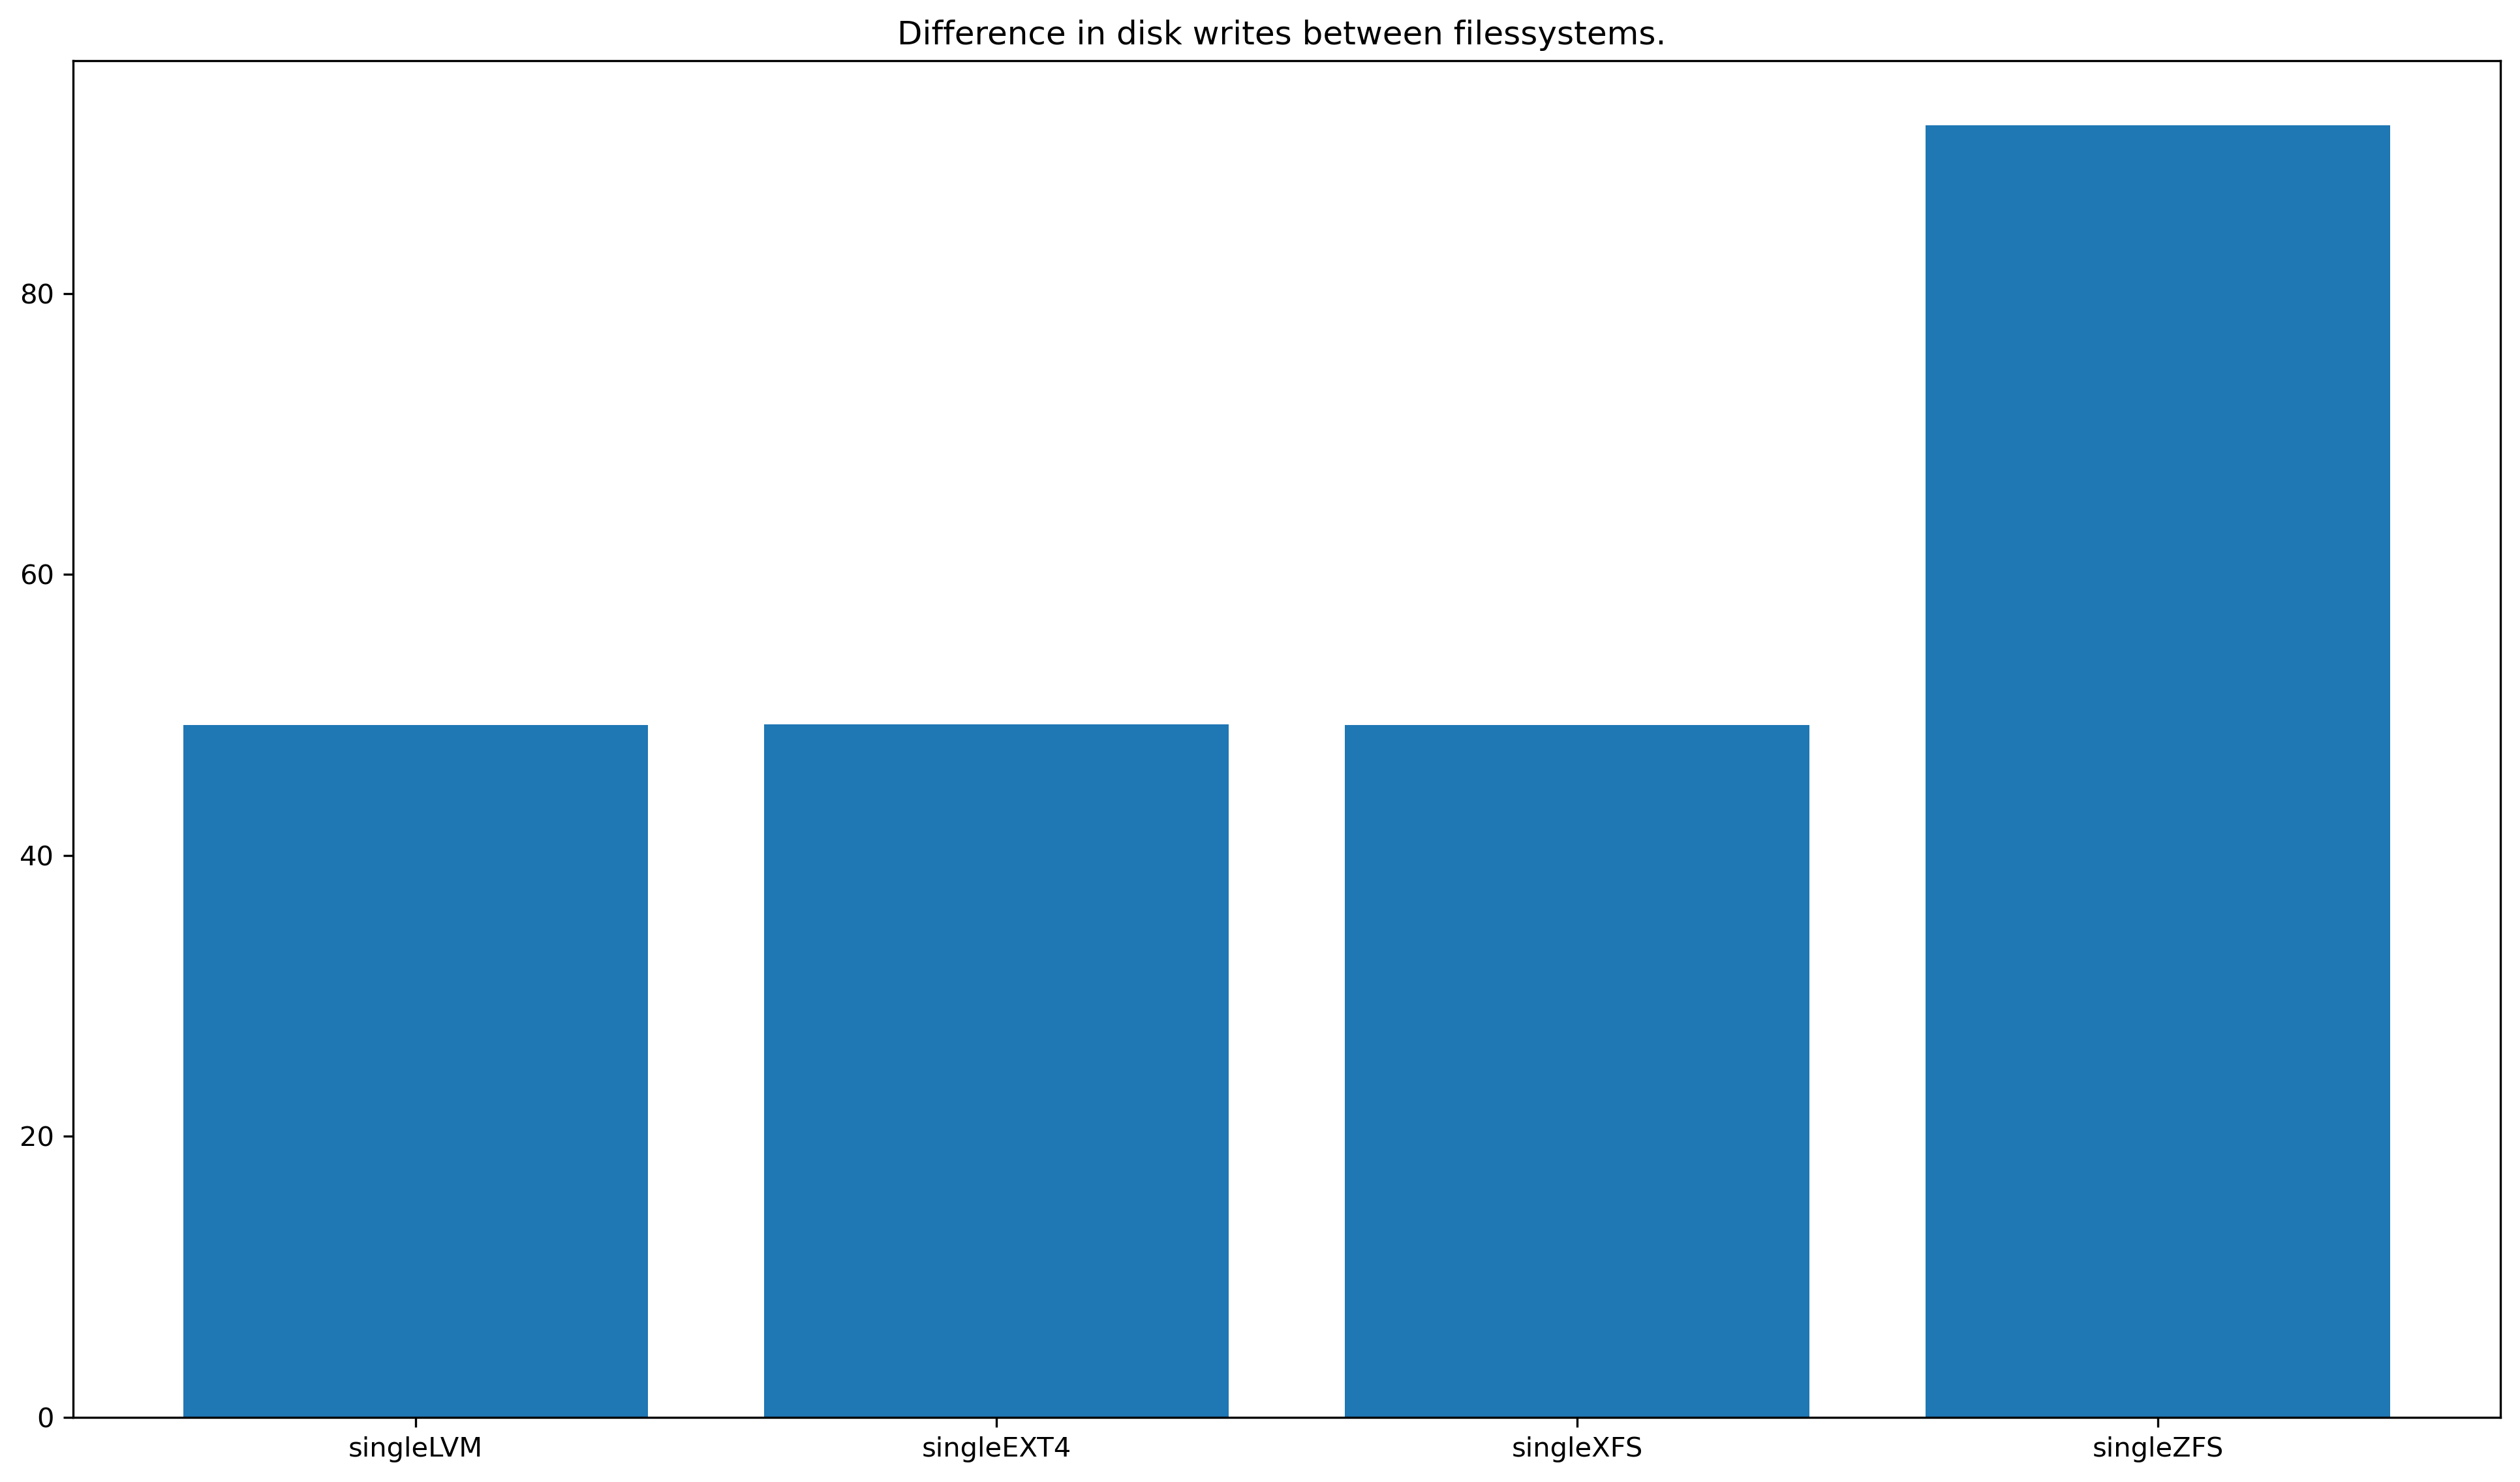

In [14]:
plt.figure(figsize=(16,9), dpi=300)
plt.bar(diffColumns.index, diffColumns['dd50GRandom'])
plt.title("Difference in disk writes between filessystems. ")

In [15]:
print(writeDiff.columns)

writeDiff['fio4kRand'] - writeDiff['fioSetup']

NameError: name 'writeDiff' is not defined

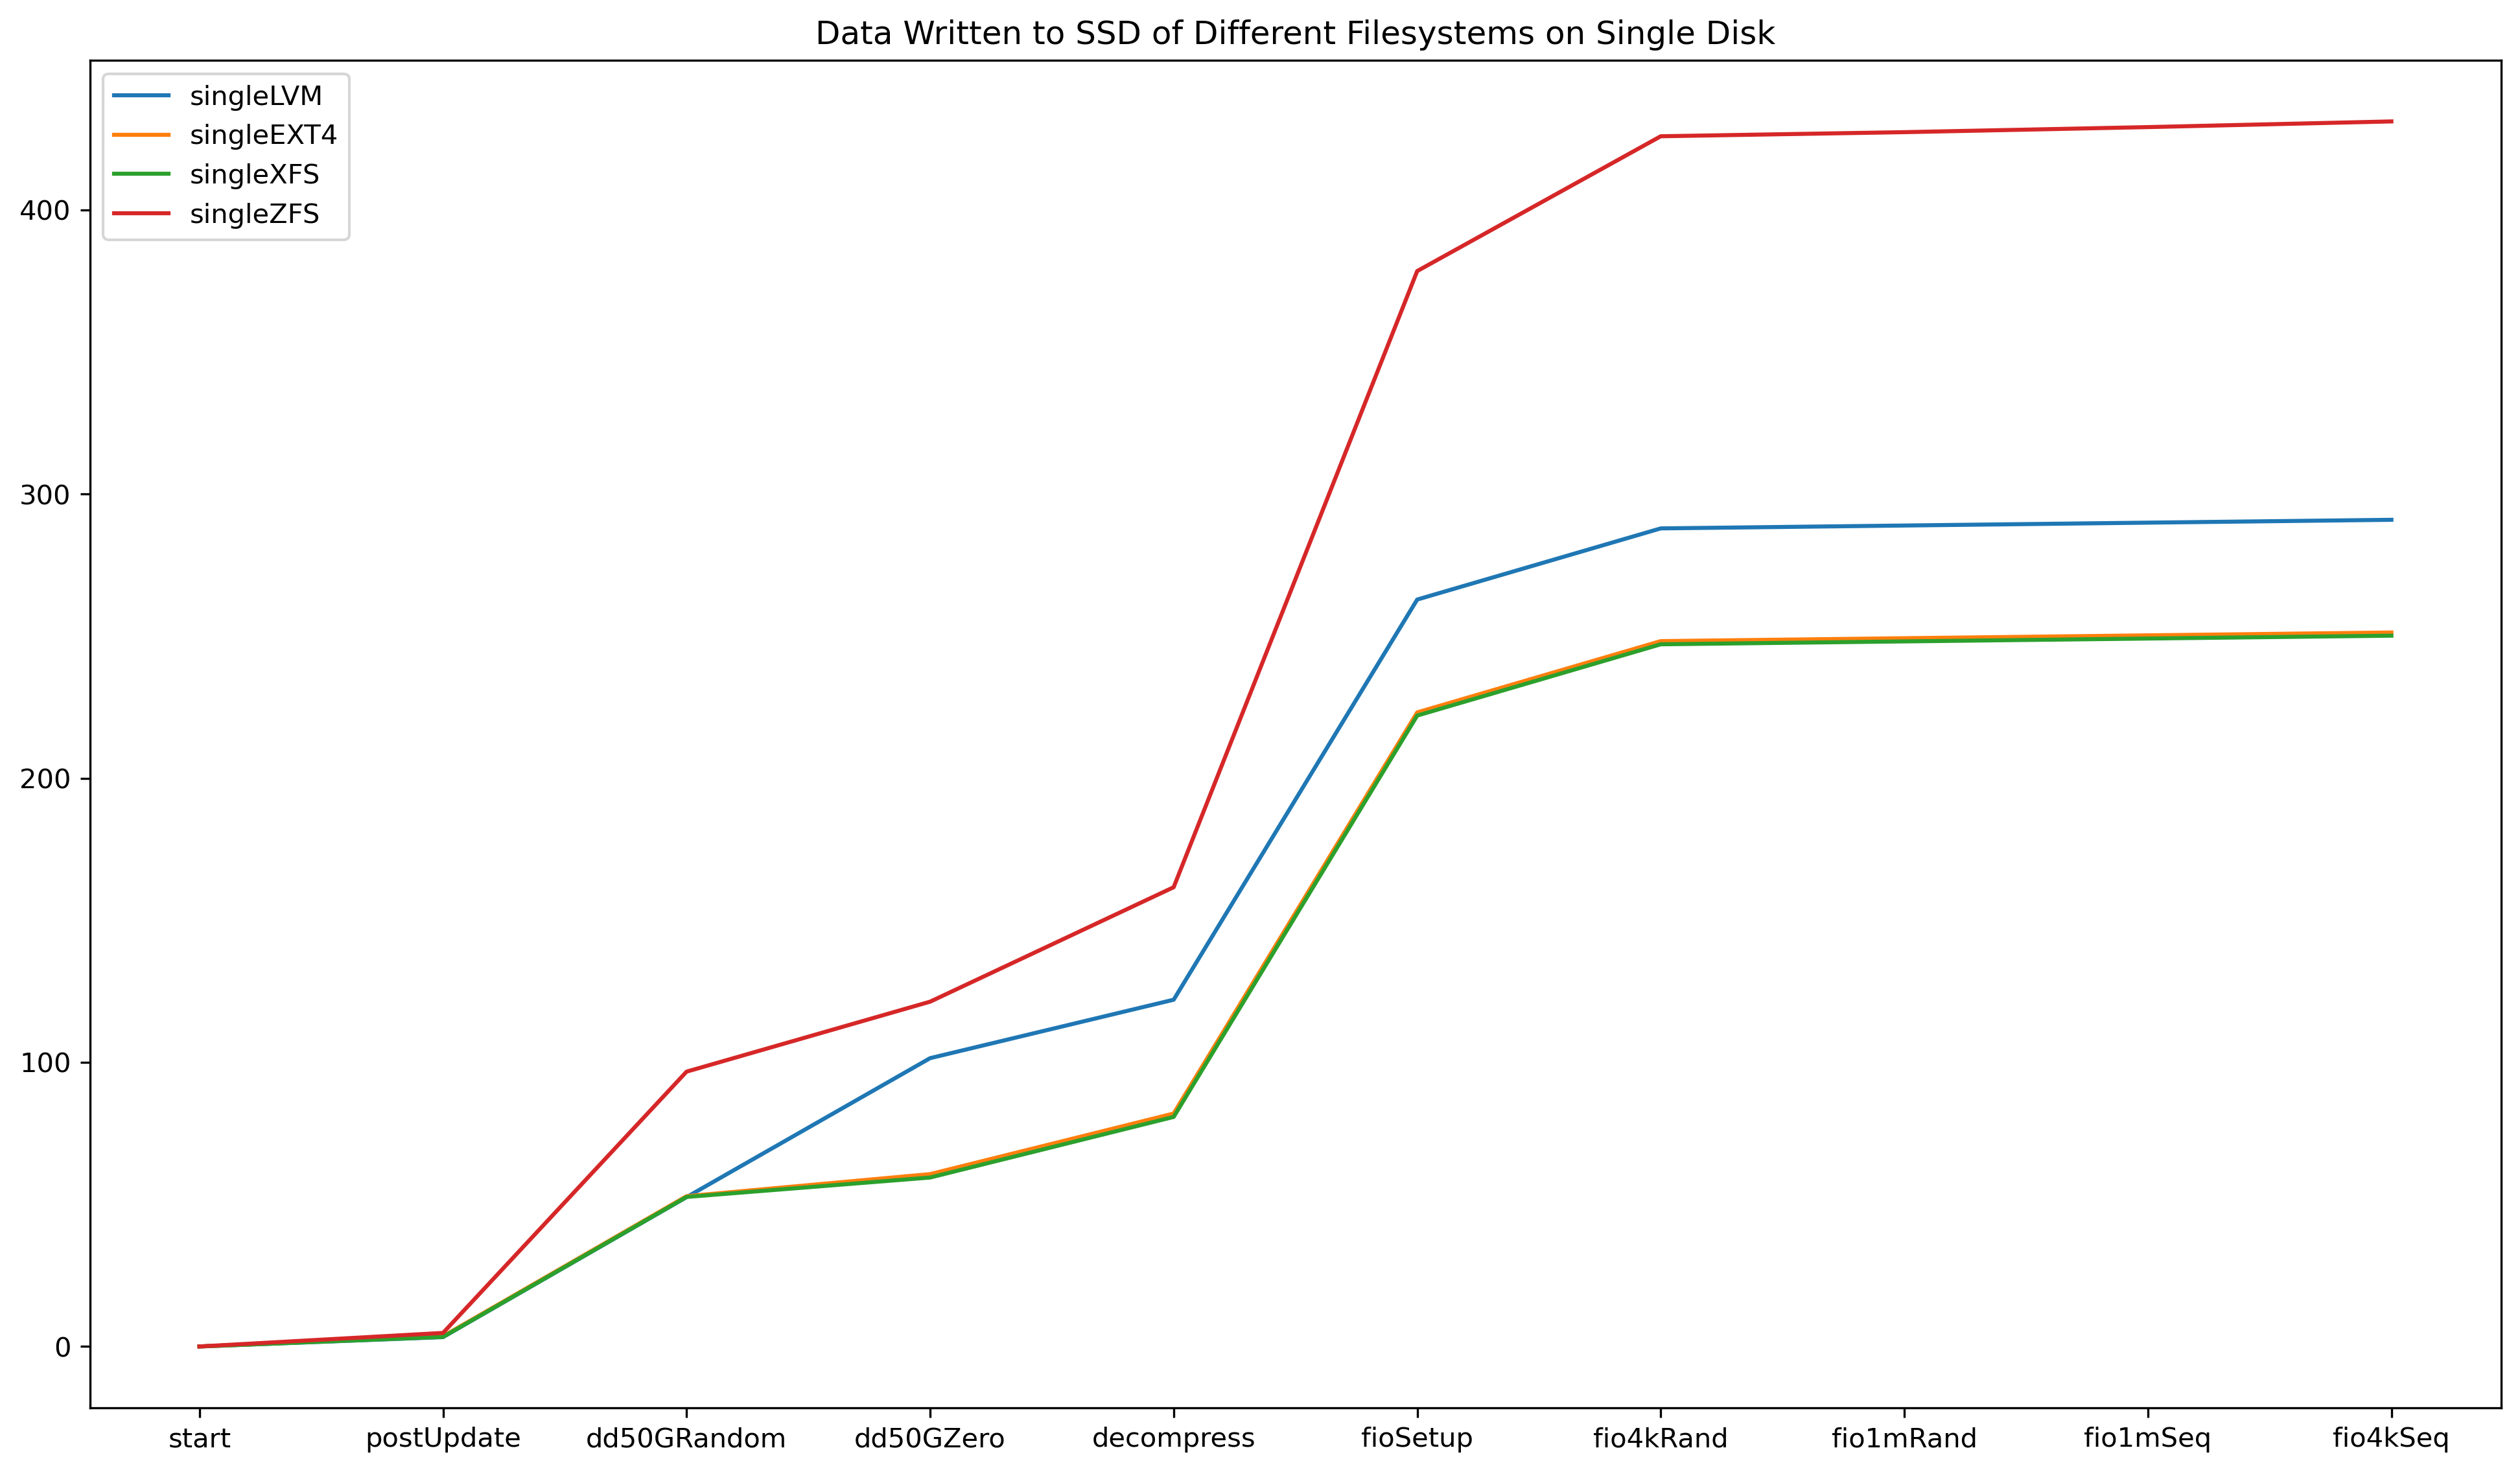

None

In [16]:
plt.figure(figsize=(16,9), dpi=300)
plotty = plt.plot(writeCompareSingleFlipped)
plotty = plt.legend(writeCompareSingleFlipped.columns)
plotty = plt.title("Data Written to SSD of Different Filesystems on Single Disk")
plotty = plt.show()

display(plotty)

In [17]:
fio4kSeq[fio4kSeq['drive'].str.startswith()]

TypeError: StringMethods.startswith() missing 1 required positional argument: 'pat'

In [53]:
#no VM tests. Does running on raw storage make a difference? Testing only ext4 and ZFS single
#ext4: /dev/sdc
#zfs: /dev/sde

#speed of writing 50GB of random data
#ext4: 198 mB/s, 48.832GB total written
#zfs: 155 mB/s, 48.889
#note different drives, but should be the same model and speed

#prelim results
#Looks like its something to do with the vm, local file copies don't do this

In [54]:
#zfs config tests
#ext4(control) : ext4 : sdb
#btrfs(can I get it to work this time?): btrfs : sdm
#zfs default: zfsDefaults : sdc
#zfs no compression: zfsNC : sdf
#zfs noatime: zfsNA: sdg
#zfs 16k recordsize: zfsRS16k: sdi
#zfs 1m recordsize : zfsRS1m: sdj
#zfs 4k recordsize: zfsRS4k: sdh
#zfs w/slog : zfsSlog: sdk
#zfs no sync : zfsNS: sdl
#zfs ashift=9 : zfsA9: sdd
#zfs ashift=13 : zfsA13: sde

In [55]:
r2start = pd.read_csv('run2/beforeTests.csv')
r2crash1 = pd.read_csv("run2/crash1.csv")
r2TestSet2 = pd.read_csv("run2/testSet2.csv")
r2Fio = pd.read_csv("run2/afterFioRand.csv")



run2DriveLinking = {
    'ext4': 'sdb',
    'btrfs': 'sdm',
    'zfsDefaults': 'sdc',
    'zfsNC': 'sdf',
    'zfsNA': 'sdg',
    'zfsRS16k': 'sdi',
    'zfsRS1m': 'sdj',
    'zfsRS4k': 'sdh',
    'zfsSlog': 'sdk',
    'zfsNS': 'sdl',
    'zfsA9': 'sdd',
    'zfsA13': 'sde'
}

r2RawData = {
    'r2start': r2start,
    'r2crash1': r2crash1,
    'r2TestSet2': r2TestSet2,
    'r2Fio': r2Fio,
}

for i in r2RawData.keys():
    curDF = r2RawData[i]
    #print(i[i['drive'].str.startswith('sd')])
    r2RawData[i] = curDF[curDF['drive'].str.startswith('sd')]

In [56]:
r2WriteCompare = pd.DataFrame(columns = r2RawData.keys())

print(r2WriteCompare.columns)

for i in run2DriveLinking.keys():
   tempRow = [] 
   for j in r2WriteCompare.columns:
         print(i)
         print(j)
         tempRow.append(r2RawData[j][r2RawData[j]['drive'] == run2DriveLinking[i]]['write'].values[0])
   r2WriteCompare.loc[i] = tempRow

r2Diff = r2WriteCompare.iloc[:, 1:] - r2WriteCompare.iloc[:, :-1].values


Index(['r2start', 'r2crash1', 'r2TestSet2', 'r2Fio'], dtype='object')
ext4
r2start
ext4
r2crash1
ext4
r2TestSet2
ext4
r2Fio
btrfs
r2start
btrfs
r2crash1
btrfs
r2TestSet2
btrfs
r2Fio
zfsDefaults
r2start
zfsDefaults
r2crash1
zfsDefaults
r2TestSet2
zfsDefaults
r2Fio
zfsNC
r2start
zfsNC
r2crash1
zfsNC
r2TestSet2
zfsNC
r2Fio
zfsNA
r2start
zfsNA
r2crash1
zfsNA
r2TestSet2
zfsNA
r2Fio
zfsRS16k
r2start
zfsRS16k
r2crash1
zfsRS16k
r2TestSet2
zfsRS16k
r2Fio
zfsRS1m
r2start
zfsRS1m
r2crash1
zfsRS1m
r2TestSet2
zfsRS1m
r2Fio
zfsRS4k
r2start
zfsRS4k
r2crash1
zfsRS4k
r2TestSet2
zfsRS4k
r2Fio
zfsSlog
r2start
zfsSlog
r2crash1
zfsSlog
r2TestSet2
zfsSlog
r2Fio
zfsNS
r2start
zfsNS
r2crash1
zfsNS
r2TestSet2
zfsNS
r2Fio
zfsA9
r2start
zfsA9
r2crash1
zfsA9
r2TestSet2
zfsA9
r2Fio
zfsA13
r2start
zfsA13
r2crash1
zfsA13
r2TestSet2
zfsA13
r2Fio


In [57]:
r2WriteCompare

,r2start,r2crash1,r2TestSet2,r2Fio
ext4,7.32678,12.30668,12.30818,105.44368
btrfs,5.15417,10.16025,10.16405,103.72289
zfsDefaults,58.38778,68.12099,68.12718,239.04373
zfsNC,10.47357,20.03439,20.04198,193.17639
zfsNA,9.45859,19.29075,19.29684,191.81855
zfsRS16k,9.30929,18.67581,18.68177,186.33032
zfsRS1m,10.88639,20.22981,20.23521,190.95942
zfsRS4k,9.35025,18.88261,18.88851,185.26877
zfsSlog,5.16791,10.18638,10.19105,102.71249
zfsNS,5.16469,10.18099,10.18583,102.68235


Text(0.5, 0, 'ZFS Settings')

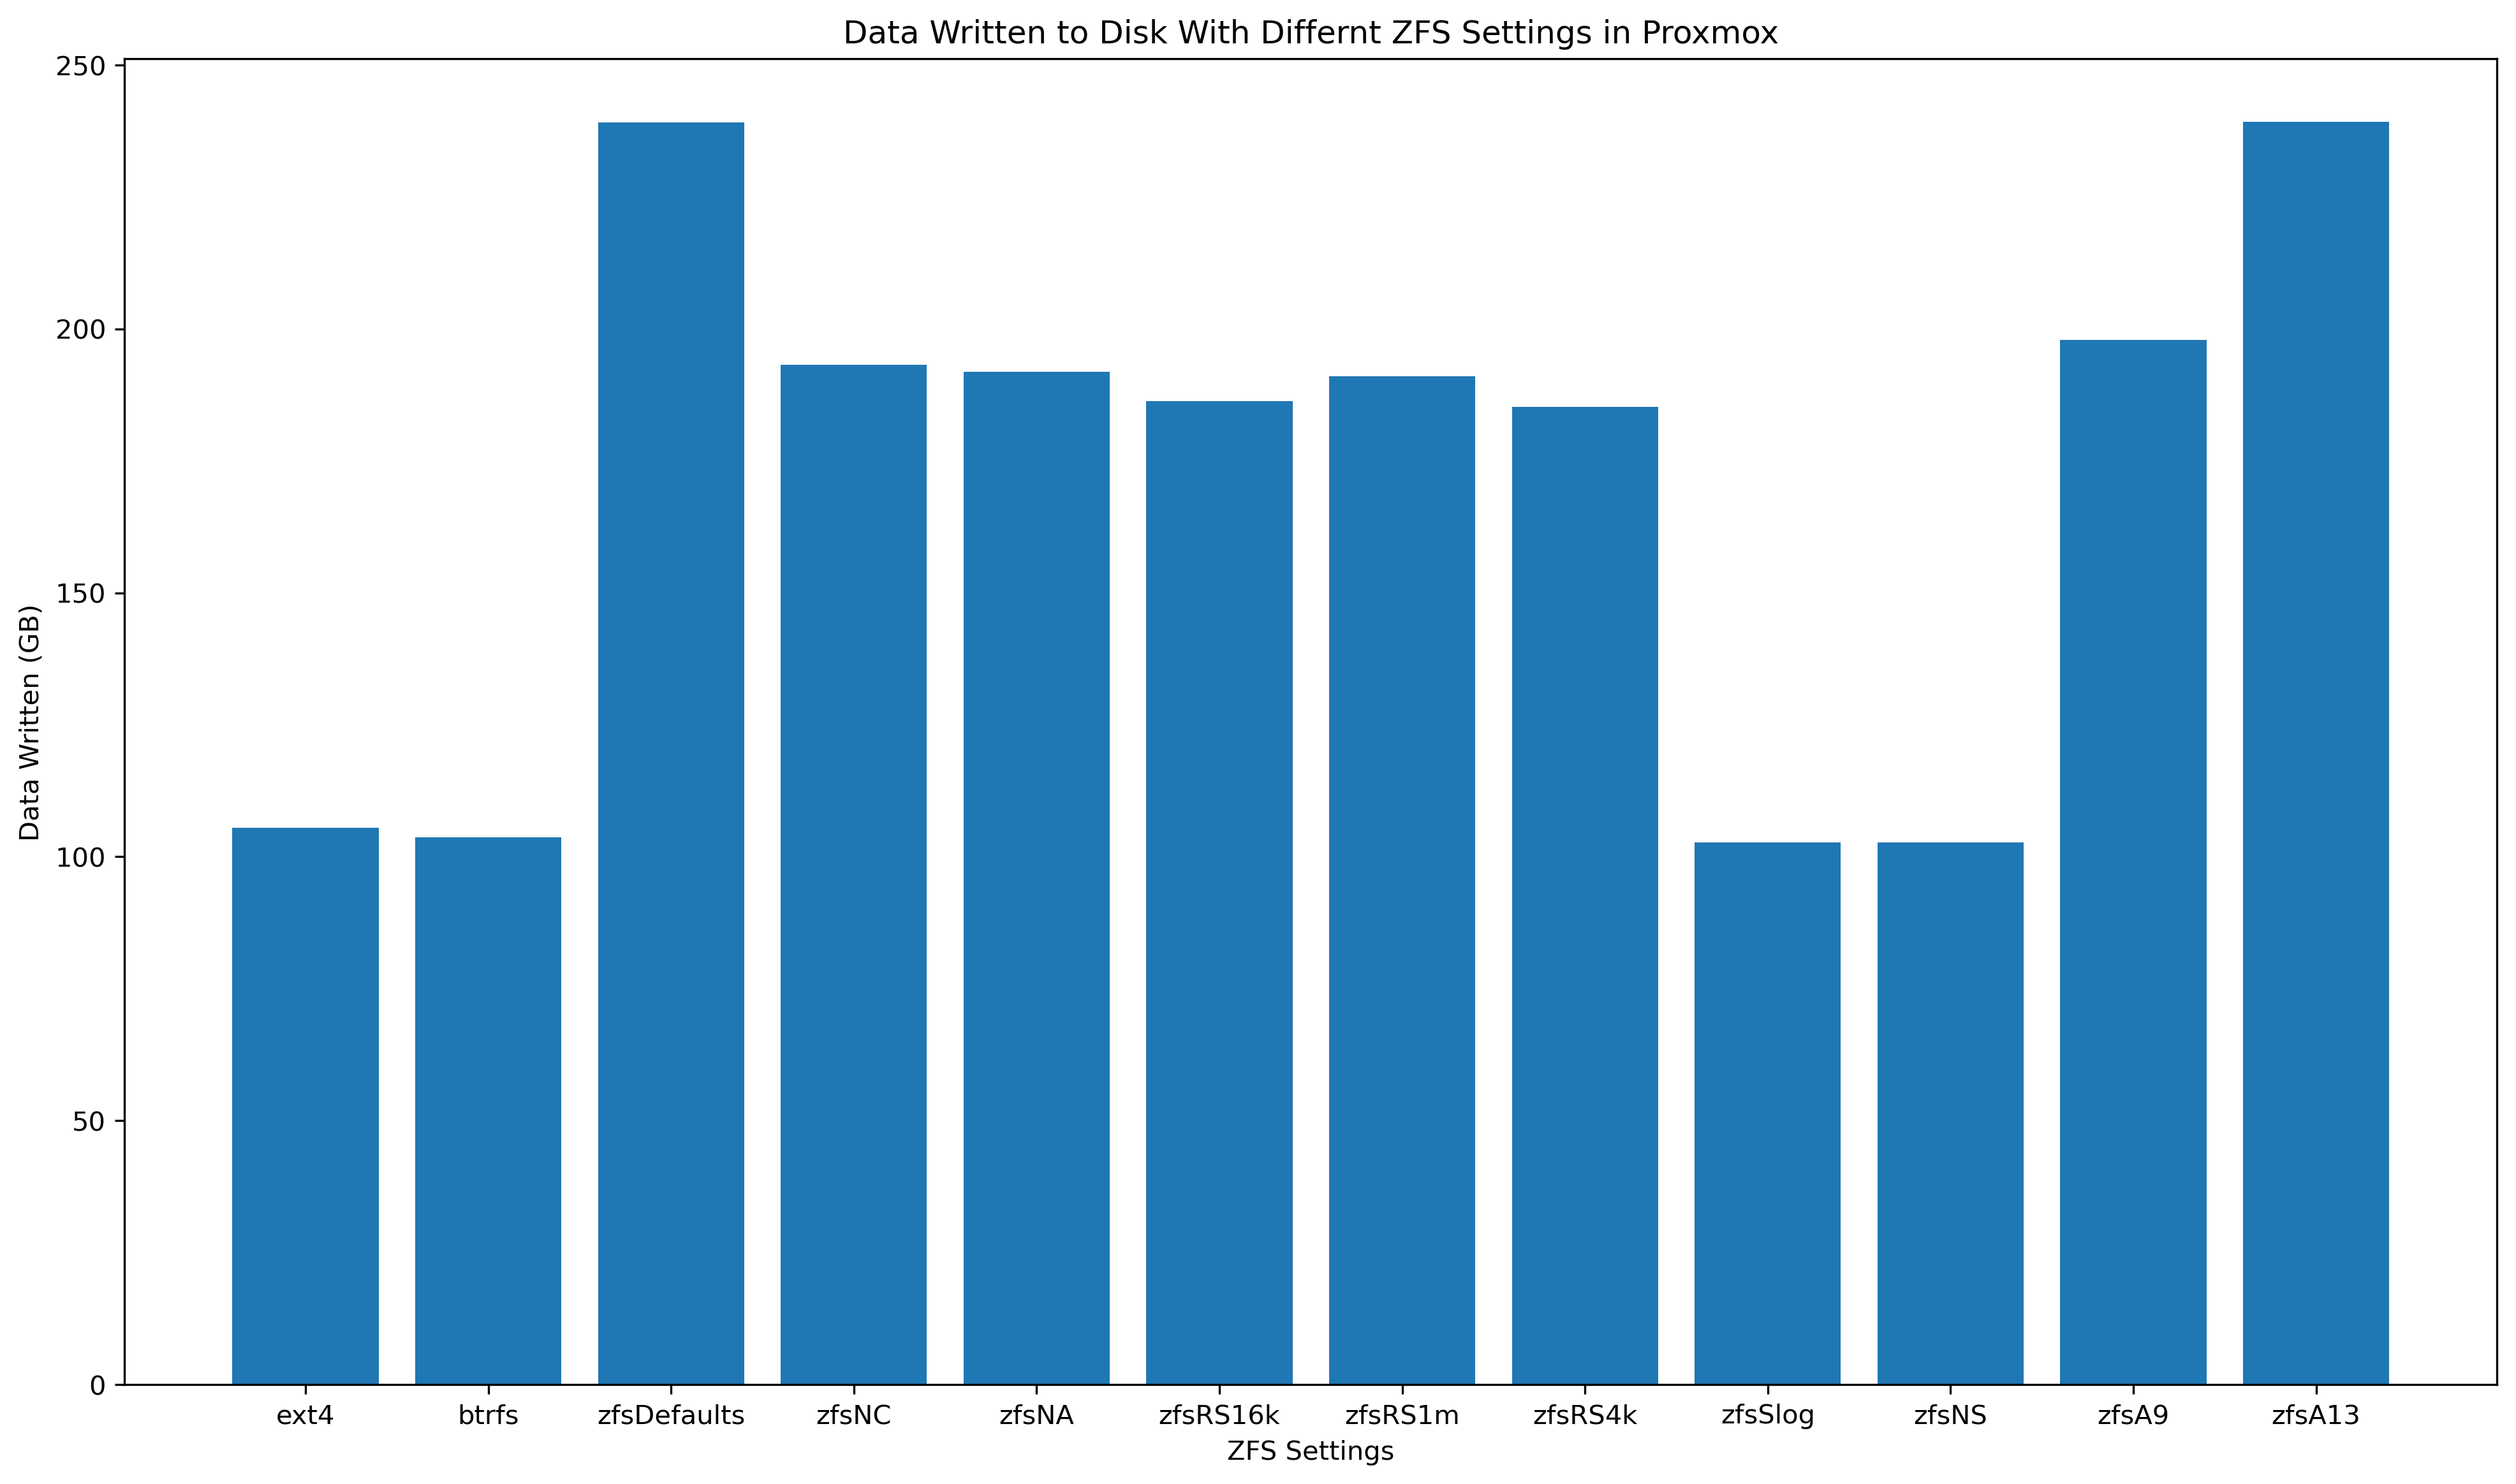

In [61]:
plt.figure(figsize=(16,9), dpi=300)
plt.bar(r2WriteCompare.index, r2WriteCompare.r2Fio)
#plt.show()
plt.title("Data Written to Disk With Differnt ZFS Settings in Proxmox")
plt.ylabel("Data Written (GB)")
plt.xlabel("ZFS Settings")

In [ ]:
#run 3. Same drive mappings as run 2
#r3 unsafe cache for all disks
#sudo blockdev --getbsz /dev/sdX
#check block size

r3start = pd.read_csv('run3/r3Start.csv')
r3Fio1 = pd.read_csv("run3/r3Fio1.csv")
r3Fio2 = pd.read_csv("run3/r3Fio2.csv")
r3DD = pd.read_csv("run3/r3DD.csv")



run3DriveLinking = {
    'ext4': 'sdb',
    'btrfs': 'sdm',
    'zfsDefaults': 'sdc',
    'zfsNC': 'sdf',
    'zfsNA': 'sdg',
    'zfsRS16k': 'sdi',
    'zfsRS1m': 'sdj',
    'zfsRS4k': 'sdh',
    'zfsSlog': 'sdk',
    'zfsNS': 'sdl',
    'zfsA9': 'sdd',
    'zfsA13': 'sde'
}

r3RawData = {
    'r3start': r3start,
    'r3Fio1': r3Fio1,
    'r3Fio2': r3Fio2,
    'r3DD': r3DD,
}

for i in r3RawData.keys():
    curDF = r3RawData[i]
    #print(i[i['drive'].str.startswith('sd')])
    r3RawData[i] = curDF[curDF['drive'].str.startswith('sd')]


r3WriteCompare = pd.DataFrame(columns = r3RawData.keys())

print(r3WriteCompare.columns)

for i in run3DriveLinking.keys():
   tempRow = [] 
   for j in r3WriteCompare.columns:
         print(i)
         print(j)
         tempRow.append(r3RawData[j][r3RawData[j]['drive'] == run3DriveLinking[i]]['write'].values[0])
   r3WriteCompare.loc[i] = tempRow

r3Diff = r3WriteCompare.iloc[:, 1:] - r3WriteCompare.iloc[:, :-1].values

Index(['r3start', 'r3Fio1', 'r3Fio2', 'r3DD'], dtype='object')
ext4
r3start
ext4
r3Fio1
ext4
r3Fio2
ext4
r3DD
btrfs
r3start
btrfs
r3Fio1
btrfs
r3Fio2
btrfs
r3DD
zfsDefaults
r3start
zfsDefaults
r3Fio1
zfsDefaults
r3Fio2
zfsDefaults
r3DD
zfsNC
r3start
zfsNC
r3Fio1
zfsNC
r3Fio2
zfsNC
r3DD
zfsNA
r3start
zfsNA
r3Fio1
zfsNA
r3Fio2
zfsNA
r3DD
zfsRS16k
r3start
zfsRS16k
r3Fio1
zfsRS16k
r3Fio2
zfsRS16k
r3DD
zfsRS1m
r3start
zfsRS1m
r3Fio1
zfsRS1m
r3Fio2
zfsRS1m
r3DD
zfsRS4k
r3start
zfsRS4k
r3Fio1
zfsRS4k
r3Fio2
zfsRS4k
r3DD
zfsSlog
r3start
zfsSlog
r3Fio1
zfsSlog
r3Fio2
zfsSlog
r3DD
zfsNS
r3start
zfsNS
r3Fio1
zfsNS
r3Fio2
zfsNS
r3DD
zfsA9
r3start
zfsA9
r3Fio1
zfsA9
r3Fio2
zfsA9
r3DD
zfsA13
r3start
zfsA13
r3Fio1
zfsA13
r3Fio2
zfsA13
r3DD


In [168]:
r3Diff

,r3Fio1,r3Fio2,r3DD
ext4,4.80162,40.63457,17.55494
btrfs,4.92494,41.05155,17.68004
zfsDefaults,4.77557,41.13489,17.69896
zfsNC,4.78318,41.32713,17.74116
zfsNA,4.80328,41.10548,17.64581
zfsRS16k,4.70174,41.21765,17.69761
zfsRS1m,4.76903,41.14694,17.72822
zfsRS4k,4.79491,41.12098,17.74383
zfsSlog,4.75832,41.16093,17.69547
zfsNS,4.72957,41.17705,17.73532
